<a href="https://colab.research.google.com/github/IsaaHack/AA/blob/main/P2_Ej4_TEMPLATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visión por Computador - Práctica 2 - Deep Learning en Computer Vision

#### 12 puntos   |   Fecha de entrega: 15 de Diciembre, 23:59   |   Forma de entrega: a través de la tarea creada en https://pradogrado2425.ugr.es/

### Estudiante: <mark>ISAAC BRAO AISSAONI</mark>

In [ ]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
!pip install -Uqq fastbook
!pip install nbdev
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

fastcore version 1.7.26 installed
fastai version 2.7.18 installed


In [ ]:
# Function to display evaluation metrics

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()



---



---



---



# <font color='blue'>**Ejercicio 4: Primeros pasos de IA explicable aplicada a redes neuronales convolucionales (1,5 puntos)**
<font color='blue'>En este ejercicio trabajaremos con el conjunto de datos Caltech-UCSD Birds-200-2011 (https://www.vision.caltech.edu/datasets/cub_200_2011/). Este conjunto de datos consta de $11788$ imágenes de $200$ especies de aves diferentes. Tiene $200$ clases, con $5994$ para entrenamiento y $5794$ para pruebas. El $10\%$ del conjunto de entrenamiento se dejará para validación.

<font color='blue'>Usaremos el modelo de red ResNet18 ya preentrenado con ImageNet, que se puede descargar desde el repositorio de modelos de fastai. Se realizará un fine-tuning de toda la red (por $10$ épocas) tras haber incorporado una cabecera adecuada para este problema (con una única fully-connected layer). Es decir, se debe hacer algo similar a lo realizado en el apartado cuarto del ejercicio 3.





---



---



---

First, we need to read the data from the URL

In [ ]:
# https://docs.fast.ai/data.external.html
path = untar_data(URLs.CUB_200_2011)
#path = Path('/root/.fastai/data/cub_200_2011')

In [ ]:
print(path)
print(path.ls())
print((path/'CUB_200_2011/').ls())
train_test_split = np.loadtxt('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt',dtype=int)
# !cat /root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt

print('Number of testing examples: ', (train_test_split[:,1]== 0).sum())
print('Number of training examples: ', (train_test_split[:,1]== 1).sum())
print(train_test_split)


/root/.fastai/data/CUB_200_2011
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011'), Path('/root/.fastai/data/CUB_200_2011/attributes.txt')]
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/attributes'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/bounding_boxes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/classes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/parts'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/README'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/image_class_labels.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt')]
Number of testing examples:  5794
Number of training examples:  5994
[[    1     0]
 [    2     1]
 [    3     0]
 ...
 [11786     0]
 [11787     1]
 [11788     0]]


In [ ]:
with open('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt') as file:
    images_list = file.readlines()
    images_list = [line.rstrip() for line in images_list]
print(images_list)

['1 001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg', '2 001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg', '3 001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg', '4 001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg', '5 001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg', '6 001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg', '7 001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg', '8 001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg', '9 001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg', '10 001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057.jpg', '11 001.Black_footed_Albatross/Black_Footed_Albatross_0023_796059.jpg', '12 001.Black_footed_Albatross/Black_Footed_Albatross_0086_796062.jpg', '13 001.Black_footed_Albatross/Black_Footed_Albatross_0049_796063.jpg', '14 001.Black_footed_Albatross/Black_Footed_Albatross_0006_796065.jpg', '15 001.Black_footed_Albatr

In [ ]:
classes = (path/'CUB_200_2011/images/').ls()
print('Number of examples per class')
for i in range(len(classes)):
  print(len(classes[i].ls()), end=" ")


Number of examples per class
60 60 60 60 60 60 59 50 60 60 60 53 59 60 60 60 60 60 60 41 60 60 60 59 59 60 60 45 60 60 44 60 60 60 60 60 60 59 60 59 60 60 60 60 60 60 60 60 59 60 59 60 60 60 60 58 60 60 60 60 60 50 59 59 60 60 60 60 60 60 60 60 60 58 60 60 59 59 60 60 60 60 48 60 60 58 59 60 60 49 60 60 60 60 60 59 50 60 59 59 60 60 60 60 57 59 60 60 60 50 60 60 59 60 60 60 60 56 58 60 60 60 60 56 59 58 53 60 60 60 60 60 60 59 60 59 60 60 51 56 60 60 59 60 60 60 60 60 59 60 60 60 60 60 52 60 57 58 60 59 60 60 60 60 59 60 60 60 60 60 59 60 60 60 60 60 59 60 59 59 60 53 60 60 60 60 59 60 59 60 60 60 60 60 60 60 60 60 60 60 

In [ ]:
#Ahora tenemos en images_list la lista con todas las imágenes, y en train_test_split cuáles pertenecen a training (1) o a test (0)
# Vamos a crear dos carpetas: una train y otra test, y vamos a meter dentro las imágenes correspondientes
print(path)
import shutil, os
if os.path.isdir('/root/.fastai/data/CUB_200_2011/train'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/train')
if os.path.isdir('/root/.fastai/data/CUB_200_2011/test'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/test')

shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/train')
shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/test')


/root/.fastai/data/CUB_200_2011


'/root/.fastai/data/CUB_200_2011/test'

In [ ]:
print((path/'train').ls())
print(len((path/'train').ls()))

[Path('/root/.fastai/data/CUB_200_2011/train/098.Scott_Oriole'), Path('/root/.fastai/data/CUB_200_2011/train/102.Western_Wood_Pewee'), Path('/root/.fastai/data/CUB_200_2011/train/195.Carolina_Wren'), Path('/root/.fastai/data/CUB_200_2011/train/165.Chestnut_sided_Warbler'), Path('/root/.fastai/data/CUB_200_2011/train/142.Black_Tern'), Path('/root/.fastai/data/CUB_200_2011/train/129.Song_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/023.Brandt_Cormorant'), Path('/root/.fastai/data/CUB_200_2011/train/113.Baird_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/086.Pacific_Loon'), Path('/root/.fastai/data/CUB_200_2011/train/120.Fox_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/002.Laysan_Albatross'), Path('/root/.fastai/data/CUB_200_2011/train/032.Mangrove_Cuckoo'), Path('/root/.fastai/data/CUB_200_2011/train/009.Brewer_Blackbird'), Path('/root/.fastai/data/CUB_200_2011/train/183.Northern_Waterthrush'), Path('/root/.fastai/data/CUB_200_2011/train/038.Great_Crested_Fly

In [ ]:
import os
for i in range(len(train_test_split)):
    if train_test_split[i,1]==0: #test image
       os.remove(path/'train'/images_list[i].rsplit(' ')[1]) #we remove it from train
    if train_test_split[i,1]==1: #train image
      os.remove(path/'test'/images_list[i].rsplit(' ')[1]) #we remove it from test

In [ ]:
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))


Total training images:  5994
Total test images:  5794


En este ejercicio es necesario reescalar las imágenes a un tamaño de $224 \times 224$, porque hay imágenes de diferentes tamaños en el conjunto de datos y la red ResNet18 ha sido entrenada con imágenes de tamaño $224 \times 224$.

Uso también un batch size de 128 y un tamaño de validación del $10\%$ del conjunto de entrenamiento, como se indica en el enunciado.

Numero de ejemplos de entrenamiento (una vez descartados los de validacion): 5395
Numero de ejemplos de validacion: 599


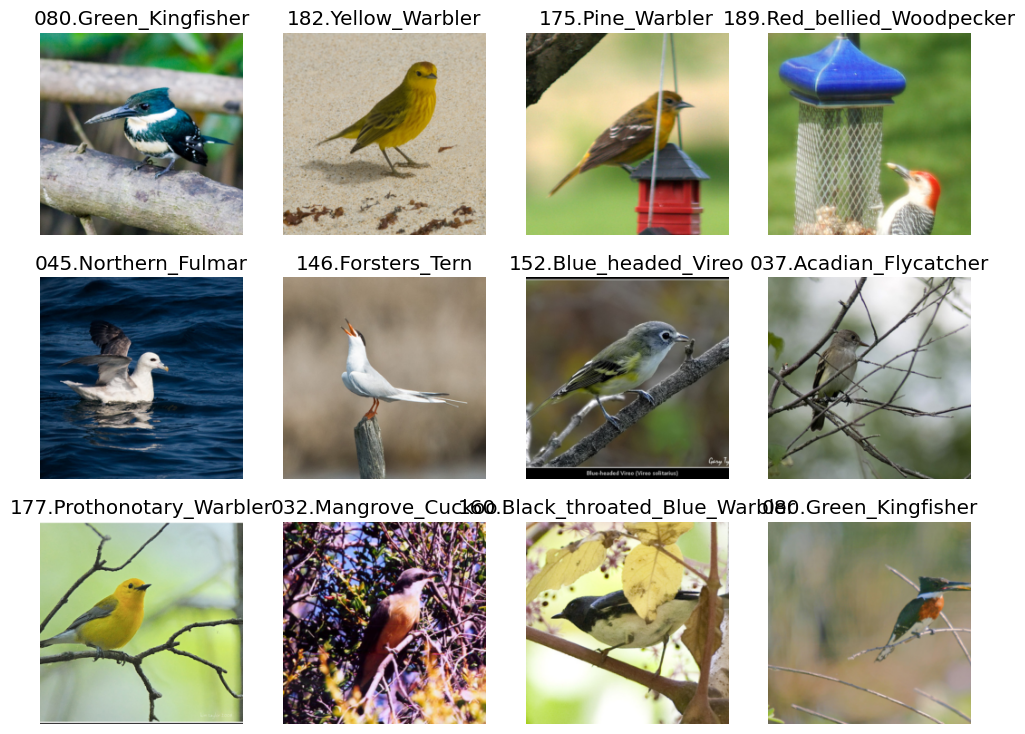

In [ ]:
CUB_200_2011 = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224),
)

dls = CUB_200_2011.dataloaders(path/'train', bs=128, device='cuda')

dls.show_batch(max_n=12)

print('Numero de ejemplos de entrenamiento (una vez descartados los de validacion):', len(dls.train_ds))
print('Numero de ejemplos de validacion:', len(dls.valid_ds))

Entrenamos con Resnet18 con metrica accuracy, porque es un problema de clasificación.

In [ ]:
#A CUBRIR POR EL ALUMNADO

#Entrenar con el modelo resnet18

learn = vision_learner(dls, resnet18, metrics=accuracy)

learn.summary()

Sequential (Input shape: 128 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 64 x 112 x 11 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     128 x 64 x 56 x 56  
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                     

Este modelo tiene muchos menos parámetros que el modelo de la práctica anterior, por lo que el entrenamiento será mucho más rápido.

In [ ]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,5.991745,3.309458,0.267112,00:19


epoch,train_loss,valid_loss,accuracy,time
0,3.563467,2.755713,0.352254,00:23
1,2.960477,2.068620,0.497496,00:23
2,2.294441,1.694721,0.570952,00:24
3,1.706982,1.542186,0.606010,00:23
4,1.233123,1.455332,0.619366,00:23
5,0.893810,1.357086,0.651085,00:24
6,0.650953,1.350797,0.649416,00:24
7,0.500641,1.319907,0.659432,00:23
8,0.397670,1.306186,0.662771,00:23
9,0.347004,1.302511,0.657763,00:23


Con el fine tuning obtenemos una accuracy de 66% en el conjunto de validation, por lo que acertamos 2 de cada 3 veces.

## <font color='blue'> Uso de GradCAM para analizar el comportamiento de redes convolucionales

<font color='blue'> Una vez entrenado el modelo, se debe aplicar Grad-CAM para visualizar los mapas de activación del último bloque convolucional. Para ello, los alumnos deben emplear el paquete `grad-cam`: `!pip install grad-cam`. Se trata de una librería con métodos del estado del arte para dotar de explicabilidad a modelos de visión por computador. Se recomienda encarecidamente revisar con calma la documentación relativa a dicho paquete (https://jacobgil.github.io/pytorch-gradcam-book/introduction.html y https://github.com/jacobgil/pytorch-grad-cam) y basarse en los ejemplos allí indicados de cara a realizar la implementación. El alumnado debe emplear Grad-CAM con, al menos, $5$ imágenes de test, así como interpretar los resultados obtenidos.

<font color='blue'> ¿En qué consiste Grad-CAM: cómo funciona y para qué sirve?


<font color='blue'> Referencia: https://arxiv.org/pdf/1610.02391.pdf

In [ ]:
!pip install grad-cam

In [ ]:
test_dl = dls.test_dl(files_test, with_labels=True)

#Accuracy
preds, targs = learn.get_preds(dl=test_dl)
acc = accuracy(preds, targs)

print('Accuracy en test:', round(acc.item(), 4)*100, '%')

Accuracy en test: 66.41 %


El acierto en test es más o menos igual que en validation, por lo que el modelo generaliza bien.

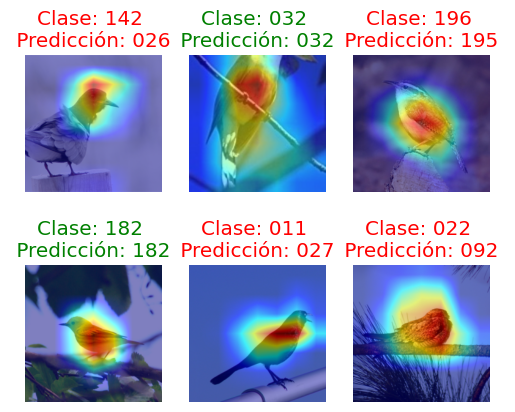

In [ ]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

# Escoger 5 images de test aleatorias y mostrarlas con su Grad-CAM

import random
import matplotlib.pyplot as plt

# Extraer modelo desde learn
model = learn.model.eval()  # Asegúrate de estar en modo evaluación

# Selecciona la capa donde aplicar Grad-CAM
# Por ejemplo, la última capa convolucional
target_layer = model[0][-1]  # Cambia según tu arquitectura

# Inicializa Grad-CAM
cam = GradCAM(model=model, target_layers=[target_layer])

# Crear figura
fig, ax = plt.subplots(2, 3, figsize=(6, 5))

# Iterar sobre 5 imágenes aleatorias
for i in range(6):
    # Seleccionar una imagen aleatoria
    idx = random.randint(0, len(files_test) - 1)
    path_img = files_test[idx]
    label = path_img.parent.name  # Asegúrate de que los datos están organizados por carpetas de clases

    # Cargar y preprocesar la imagen
    img = PILImage.create(path_img)
    img = Resize(224)(img)  # Redimensionar la imagen al tamaño esperado por el modelo
    img_tensor = tensor(img).float() / 255.  # Convertir a tensor y normalizar a rango [0, 1]
    img_tensor = img_tensor.permute(2, 0, 1).unsqueeze(0)  # Reordenar dimensiones y añadir dimensión batch

    # Normalizar usando los valores del DataLoader
    img_normalized = Normalize()(img_tensor)
    input_tensor = img_normalized

    # Obtener el índice de la clase
    class_idx = learn.dls.vocab.o2i[label]

    # Generar el heatmap
    targets = [ClassifierOutputTarget(class_idx)]  # Índice de la clase a la que pertenece la imagen
    grayscale_cam = cam(input_tensor=img_normalized, targets=targets)
    grayscale_cam = grayscale_cam[0, :]  # Quitar dimensión batch

    # Convertir la imagen original a formato numpy (rango [0, 1])
    img_original = img_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy()

    # Superponer Grad-CAM en la imagen original
    visualization = show_cam_on_image(img_original, grayscale_cam, use_rgb=True)

    pred = learn.predict(path_img)[0]  # Predicción de la red

    # Comparar para decidir el color
    color = "green" if label == pred else "red"

    # Mostrar el resultado
    ax[i // 3, i % 3].imshow(visualization)
    ax[i // 3, i % 3].set_title(f"Clase: {label.split('.')[0]} \n Predicción: {pred.split('.')[0]} ", color=color)
    ax[i // 3, i % 3].axis("off")

Podemos ver que Grad-CAM nos muestra las zonas de la imagen que han sido más importantes para la clasificación. En este caso, se puede ver que el modelo se fija en las zonas de la imagen donde se encuentra el ave, por lo que parece que está aprendiendo bien. Parece que solamente tiene que aprender mejor a distinguir entre las diferentes especies de aves.